## Section 4:  How to mine data and store it 
### 1) Text mining
### 2) Network mining
### 3) Python matrix library
### 4) Mining a database-SQL  

### 1) Text mining 

In [27]:
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Specifically we're going to build a spam filter. As we've said before, this is a classic use for this kind of classifier and it's not too difficult to set up. The dataset we'll work with is UC Irvine's SMS spam dataset. https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection

In [44]:
# Grab and process the raw data.
data_path = ("data/SMSSpamCollection")

sms_raw = pd.read_table('data/SMSSpamCollection',  header=None)

sms_raw.columns = ['spam', 'message']

In [46]:
sms_raw.head(10) 

,spam,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [32]:
sms_raw.spam.value_counts()

ham     4825
spam     747
Name: spam, dtype: int64

In [47]:
sms_raw.shape

(5572, 2)

In [48]:
keywords = ['click', 'offer', 'winner', 'buy', 'free', 'cash', 'urgent', 'money'] 


for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    sms_raw[str(key)] = sms_raw.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [51]:
sms_raw.tail(10)

,spam,message,click,offer,winner,buy,free,cash,urgent,money
5562,ham,Ok lor... Sony ericsson salesman... I ask shuh...,False,False,False,False,False,False,False,False
5563,ham,Ard 6 like dat lor.,False,False,False,False,False,False,False,False
5564,ham,Why don't you wait 'til at least wednesday to ...,False,False,False,False,False,False,False,False
5565,ham,Huh y lei...,False,False,False,False,False,False,False,False
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...,False,False,False,False,True,False,False,False
5567,spam,This is the 2nd time we have tried 2 contact u...,False,False,False,False,False,False,False,False
5568,ham,Will ü b going to esplanade fr home?,False,False,False,False,False,False,False,False
5569,ham,"Pity, * was in mood for that. So...any other s...",False,False,False,False,False,False,False,False
5570,ham,The guy did some bitching but I acted like i'd...,False,False,False,False,False,False,False,False
5571,ham,Rofl. Its true to its name,False,False,False,False,False,False,False,False


In [52]:
sms_raw['allcaps'] = sms_raw.message.str.isupper() #caps or not 

In [55]:
sms_raw[sms_raw.allcaps==True].head(2)

,spam,message,click,offer,winner,buy,free,cash,urgent,money,allcaps
14,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,False,False,False,False,False,False,False,False,True
43,ham,WHO ARE YOU SEEING?,False,False,False,False,False,False,False,False,True


In [56]:
sms_raw.corr()

,click,offer,winner,buy,free,cash,urgent,money,allcaps
click,1.000000,-0.001762,-0.001392,-0.003124,-0.005735,-0.003454,-0.001245,-0.002721,-0.004301
offer,-0.001762,1.000000,-0.002275,-0.005106,0.109339,-0.005646,-0.002035,-0.004447,-0.007030
winner,-0.001392,-0.002275,1.000000,-0.004035,-0.007407,0.199283,-0.001608,0.048007,-0.005554
buy,-0.003124,-0.005106,-0.004035,1.000000,-0.016623,-0.010011,-0.003608,0.015239,-0.012465
free,-0.005735,0.109339,-0.007407,-0.016623,1.000000,-0.008204,-0.006624,-0.001611,-0.022883
cash,-0.003454,-0.005646,0.199283,-0.010011,-0.008204,1.000000,0.041561,-0.008718,-0.013782
urgent,-0.001245,-0.002035,-0.001608,-0.003608,-0.006624,0.041561,1.000000,-0.003142,-0.004967
money,-0.002721,-0.004447,0.048007,0.015239,-0.001611,-0.008718,-0.003142,1.000000,-0.010855
allcaps,-0.004301,-0.007030,-0.005554,-0.012465,-0.022883,-0.013782,-0.004967,-0.010855,1.000000


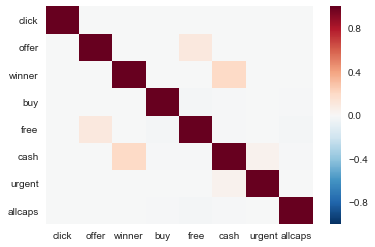

In [38]:
sns.heatmap(sms_raw.corr())

That is actually a great looking plot for us. Most of the words show strong independence from each other. The only exceptions are free:offer and cash:winner. For now, let's keep everything in the dataset.

Before we actually run the model we have to build out our training data. SKLearn required you to specify an outcome (y or dependent variable) and your inputs (x or independent variables). We'll do that below under the titles `data` and `target`.

In [57]:
data = sms_raw[keywords + ['allcaps']]

target = sms_raw['spam']

In [58]:
data.head(2)

,click,offer,winner,buy,free,cash,urgent,money,allcaps
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False


In [60]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 5572 points : 604


In [61]:
from sklearn.metrics import confusion_matrix 

In [62]:
confusion_matrix(target,  y_pred)

array([[4770,   55],
       [ 549,  198]])

Now try adding some of your own features and seeing if you can improve the model's performance. Also try comparing the other types of Naive Bayes Classifier and see which one is best. You can find the function names for training other kinds of Naive Bayes in the [documentation](http://scikit-learn.org/stable/modules/naive_bayes.html). It's a one word change.

### 2) Network Mining 

Making graphs in Python

There are many different libraries for creating, visualizing, and analyzing graphs in Python.  We'll be using ´networkx´, which visualizes graphs using the matplotlib engine.  To start, let's re-create our directed graph from the last assig

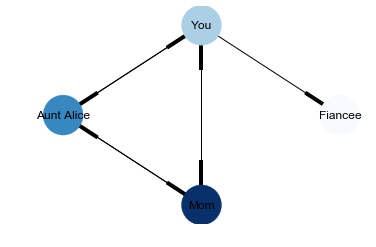

In [64]:
import networkx as nx

#conda install networkx  


#Creating a directed graph
G = nx.DiGraph()


#Adding nodes.  We could have added them all in one list using .add_nodes_from()
G.add_node('You')
G.add_node('Mom')
G.add_node('Aunt Alice')
G.add_node('Fiancee')

#Adding edges.  You can also add them individually using .add_edge() 
G.add_edges_from([('You','Mom'),('You','Fiancee')])
G.add_edges_from([('Mom','You'),('Mom','Aunt Alice')])
G.add_edges_from([('Aunt Alice','Mom'),('Aunt Alice','You'), ('You', 'Aunt Alice')])


#Drawing the graph
nx.draw_networkx(G,
                 pos=nx.circular_layout(G), # Positions the nodes relative to each other
                 node_size=1600, 
                 cmap=plt.cm.Blues, # The color palette to use to color the nodes.
                 node_color=range(len(G)) #The number of shades of color to use.
                 )
plt.axis('off')
plt.show()


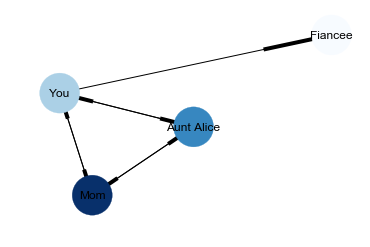

In [65]:
nx.draw_networkx(G,
                 pos=nx.spring_layout(G), # Positions the nodes relative to each other
                 node_size=1600, 
                 cmap=plt.cm.Blues, # The color palette to use to color the nodes.
                 node_color=range(len(G)) #The number of shades of color to use.
                 )
plt.axis('off')
plt.show()

In [72]:
G.degree()

{'Aunt Alice': 4, 'Fiancee': 1, 'Mom': 4, 'You': 5}

In [7]:
print("This graph has {} nodes and {} edges.".format(G.number_of_nodes(),G.number_of_edges()))

print('The "Aunt Alice" node has an in-degree of {} and an out-degree of {}.'.format(G.in_degree('Aunt Alice'),G.out_degree('Aunt Alice')))

print("The nodes are {}.".format(G.nodes()))

print("The edges are {}.".format(G.edges()))

print("The betweenness centrality scores are {}".format(nx.betweenness_centrality(G))) #Compute the shortest-path betweenness centrality for nodes. 

print('The node degrees are {}.'.format(G.degree())) #The node degree is the number of edges adjacent to that node. 



This graph has 4 nodes and 6 edges.
The "Aunt Alice" node has an in-degree of 1 and an out-degree of 2.
The nodes are ['Fiancee', 'You', 'Aunt Alice', 'Mom'].
The edges are [('You', 'Fiancee'), ('You', 'Mom'), ('Aunt Alice', 'You'), ('Aunt Alice', 'Mom'), ('Mom', 'You'), ('Mom', 'Aunt Alice')].
The betweenness centrality scores are {'Fiancee': 0.0, 'You': 0.3333333333333333, 'Aunt Alice': 0.0, 'Mom': 0.16666666666666666}
The node degrees are {'Fiancee': 1, 'You': 4, 'Aunt Alice': 3, 'Mom': 4}.


#### Hubs

It is apparent that the "You" node is the hub of the network, with a high degree (4) and the highest betweenness centrality score (.33).  That node touches many other nodes, and is part of the shortest path between many nodes.  If we wanted to disseminate information throughout the network, it would be a good idea to start by telling "You."

#### Paths

We can compute the lengths of all the simple paths between nodes.  The return is a dictionary of pairwise node connectivity, giving the starting node and a list of all ending nodes with the length of the simple path connecting each starting/ending pair.  

Similarly, we can get a list of all the shortest paths.  The return is a dictionary of dictionaries formatted such that `source : { target1=[list of nodes in path], target2=[list of nodes in path]}`.

In [73]:
print("Simple paths:",nx.all_pairs_node_connectivity(G),'\n')
print("Shortest paths:", nx.all_pairs_shortest_path(G))

('Simple paths:', {'Fiancee': {'You': 0, 'Aunt Alice': 0, 'Mom': 0}, 'You': {'Fiancee': 1, 'Aunt Alice': 2, 'Mom': 2}, 'Aunt Alice': {'Fiancee': 1, 'You': 2, 'Mom': 2}, 'Mom': {'Fiancee': 1, 'You': 2, 'Aunt Alice': 2}}, '\n')
('Shortest paths:', {'Fiancee': {'Fiancee': ['Fiancee']}, 'You': {'Fiancee': ['You', 'Fiancee'], 'You': ['You'], 'Aunt Alice': ['You', 'Aunt Alice'], 'Mom': ['You', 'Mom']}, 'Aunt Alice': {'Fiancee': ['Aunt Alice', 'You', 'Fiancee'], 'Aunt Alice': ['Aunt Alice'], 'You': ['Aunt Alice', 'You'], 'Mom': ['Aunt Alice', 'Mom']}, 'Mom': {'Fiancee': ['Mom', 'You', 'Fiancee'], 'You': ['Mom', 'You'], 'Aunt Alice': ['Mom', 'Aunt Alice'], 'Mom': ['Mom']}})


In [74]:
nx.all_pairs_shortest_path(G)

{'Aunt Alice': {'Aunt Alice': ['Aunt Alice'],
  'Fiancee': ['Aunt Alice', 'You', 'Fiancee'],
  'Mom': ['Aunt Alice', 'Mom'],
  'You': ['Aunt Alice', 'You']},
 'Fiancee': {'Fiancee': ['Fiancee']},
 'Mom': {'Aunt Alice': ['Mom', 'Aunt Alice'],
  'Fiancee': ['Mom', 'You', 'Fiancee'],
  'Mom': ['Mom'],
  'You': ['Mom', 'You']},
 'You': {'Aunt Alice': ['You', 'Aunt Alice'],
  'Fiancee': ['You', 'Fiancee'],
  'Mom': ['You', 'Mom'],
  'You': ['You']}}

### 3) Python Matrix Libraries

In [ ]:
## Numpy 

## Pandas 

In [90]:
A= np.array([[1,2,3], [4,5,6]])

In [93]:
A

array([[1, 2, 3],
       [4, 5, 6]])

In [95]:
A.T.T

array([[1, 2, 3],
       [4, 5, 6]])

In [96]:
B=np.array([[7,8,9], [10,11,12]])

In [97]:
np.dot(A,B.T)   

array([[ 50,  68],
       [122, 167]])

In [98]:
C=A**2 

In [99]:
C

array([[ 1,  4,  9],
       [16, 25, 36]])

In [100]:
D= A-1 

In [101]:
D

array([[0, 1, 2],
       [3, 4, 5]])

In [103]:
C2=np.array([[1,2,3], [1,2,3], [3,4,5]])

In [105]:
C2

array([[1, 2, 3],
       [1, 2, 3],
       [3, 4, 5]])

In [104]:
C2.diagonal()

array([1, 2, 5])

In [106]:
A=np.matrix(A)  

In [108]:
type(A)

numpy.matrixlib.defmatrix.matrix

In [78]:
B=np.matrix(B)

In [79]:
C=np.matrix(C)

In [109]:
A

matrix([[1, 2, 3],
        [4, 5, 6]])

In [80]:
A.nonzero() #Return the indices of the elements that are non-zero. 

(array([0, 0, 0, 1, 1, 1]), array([0, 1, 2, 0, 1, 2]))

In [110]:
A-B 

matrix([[-6, -6, -6],
        [-6, -6, -6]])

In [82]:
A+B

matrix([[ 8, 10, 12],
        [14, 16, 18]])

In [111]:
A.dot(B.T) 

matrix([[ 50,  68],
        [122, 167]])

In [113]:
A

matrix([[1, 2, 3],
        [4, 5, 6]])

In [115]:
print A.sum(), A.mean(), A.std(), A.var()

21 3.5 1.70782512766 2.91666666667


In [116]:
A_df=pd.DataFrame(A)

In [118]:
type(A_df) 

pandas.core.frame.DataFrame

### 4) SQL

In [17]:
## Postgre SQL, SQLite 

Relational DB 
Download sqlite studio (GUI) https://sqlitestudio.pl/index.rvt

In [ ]:
# select * from procedure;

# select  specialty, count(id) as physician_count 
# from physician
# group by specialty
# order by 2 desc 
# limit 10 ;


# select  specialty, count(distinct procedure_code)  
# from  physician a 
# join procedure b on a.id=b.physician_id
# group by specialty ;
